In [1]:
import boto3
import sys
import threading

In [2]:
s3 = boto3.resource('s3')

In [3]:
for ob in s3.Bucket("cornwalljonesphotobucket").objects.filter(Prefix="photos/"):
    print(ob)

s3.ObjectSummary(bucket_name='cornwalljonesphotobucket', key='photos/negatives/1978/DSC_0198.NEF')
s3.ObjectSummary(bucket_name='cornwalljonesphotobucket', key='photos/negatives/1978/DSC_0199.NEF')
s3.ObjectSummary(bucket_name='cornwalljonesphotobucket', key='photos/negatives/1978/DSC_0200.NEF')
s3.ObjectSummary(bucket_name='cornwalljonesphotobucket', key='photos/negatives/1978/DSC_0201.NEF')
s3.ObjectSummary(bucket_name='cornwalljonesphotobucket', key='photos/negatives/1978/DSC_0202.NEF')
s3.ObjectSummary(bucket_name='cornwalljonesphotobucket', key='photos/negatives/1978/DSC_0203.NEF')
s3.ObjectSummary(bucket_name='cornwalljonesphotobucket', key='photos/negatives/1978/DSC_0204.NEF')
s3.ObjectSummary(bucket_name='cornwalljonesphotobucket', key='photos/negatives/1978/DSC_0205.NEF')
s3.ObjectSummary(bucket_name='cornwalljonesphotobucket', key='photos/negatives/1978/DSC_0206.NEF')
s3.ObjectSummary(bucket_name='cornwalljonesphotobucket', key='photos/negatives/1978/DSC_0207.NEF')
s3.ObjectS

In [4]:
ddb = boto3.resource('dynamodb')

In [5]:
ddb.Table("images").put_item(Item = {"id":"yeet2", "neg":True})

{'ResponseMetadata': {'RequestId': '9IS84JAJACCDMFRL7ULNS6FLO3VV4KQNSO5AEMVJF66Q9ASUAAJG',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'server': 'Server',
   'date': 'Fri, 02 Apr 2021 20:39:02 GMT',
   'content-type': 'application/x-amz-json-1.0',
   'content-length': '2',
   'connection': 'keep-alive',
   'x-amzn-requestid': '9IS84JAJACCDMFRL7ULNS6FLO3VV4KQNSO5AEMVJF66Q9ASUAAJG',
   'x-amz-crc32': '2745614147'},
  'RetryAttempts': 0}}

In [6]:
ddb.batch_get_item(
            RequestItems = {
                'images':{
                    'Keys':[
                        {
                            "id":"yeet2"
                        },
                        {
                            "id":"notyeet"
                        },
                        
                    ]
                }
            }
        )

{'Responses': {'images': [{'id': 'yeet2', 'neg': True}]},
 'UnprocessedKeys': {},
 'ResponseMetadata': {'RequestId': 'S2V4UIKLTHUO3GG4AVB7KKGNFBVV4KQNSO5AEMVJF66Q9ASUAAJG',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'server': 'Server',
   'date': 'Fri, 02 Apr 2021 20:39:02 GMT',
   'content-type': 'application/x-amz-json-1.0',
   'content-length': '88',
   'connection': 'keep-alive',
   'x-amzn-requestid': 'S2V4UIKLTHUO3GG4AVB7KKGNFBVV4KQNSO5AEMVJF66Q9ASUAAJG',
   'x-amz-crc32': '2806324601'},
  'RetryAttempts': 0}}

In [7]:
import numpy as np
a = []
for i in range(3):
    a.append(np.zeros((1,3)))
np.asarray(a)

array([[[0., 0., 0.]],

       [[0., 0., 0.]],

       [[0., 0., 0.]]])

In [8]:
list(np.zeros(2))

[0.0, 0.0]

In [9]:
ddb.Table("albums").get_item(Key={"id":"overyalbumtest"})["Item"]["images"]

['fa4443f88aaaefcd77d76ff4f73f9653b1428c30437186ec1ba45af997d72aab1e71f2b2478b9272ba3d53f57b4f8c6a',
 '1bb86ff9945e2d4d8aa4a88639c8c04dca3ded29225ab2ec6877e9cac8164ca8dd8daf5ef84a44606d9906fdc5627618']

In [14]:
np.asarray(ddb.Table("albums").get_item(Key={"id":"overyalbumtest"})["Item"]["whitepoint"], dtype=np.double)

array([0.08147641, 0.92816121, 0.55251555])

In [15]:
import rawpy
buckett = boto3.resource("s3").Bucket("cornwalljonesphotobucket")
print("getting")
imbytes = buckett.Object("fa4443f88aaaefcd77d76ff4f73f9653b1428c30437186ec1ba45af997d72aab1e71f2b2478b9272ba3d53f57b4f8c6araw").get()["Body"]
print("got")
rpy = rawpy.RawPy()
rpy.open_buffer(imbytes)
rpy.unpack()

getting
got


In [16]:
pog = rpy.postprocess(output_bps=16, user_wb=[1, 1, 1, 1], gamma=(1, 1), no_auto_bright=True, user_flip=0)
pog = pog/pog.max()

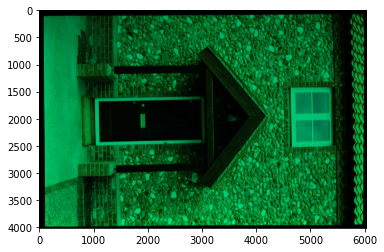

In [26]:

import matplotlib.pyplot as plt
import cv2
_, enc = cv2.imencode(".jpeg",  (pog*255).astype(np.uint8), [cv2.IMWRITE_JPEG_QUALITY, 90])
dec = cv2.imdecode(enc, cv2.IMREAD_COLOR)
plt.imshow(dec)